In [ ]:
# Title

In [1]:
print("project name: Insurance Churn")

project name: Insurance Churn


In [ ]:
# A brief about problem statemnt

In [ ]:
'''
Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from 
millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a 
different insurance provider.
For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, 
insurance companies rely on data to understand customer behaviour to prevent retention. Thus knowing whether a customer is 
possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from 
actually happening.
Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to
build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.
You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance 
industry
'''

In [ ]:
# Loading required libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
sns.set_style("whitegrid")
from xgboost import XGBClassifier

In [ ]:
# Loading dataset

In [3]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [ ]:
# shape of dataset

In [4]:
print("shape of train dataset:",train.shape)
print("shape of test dataset:",test.shape)

shape of train dataset: (33908, 17)
shape of test dataset: (11303, 16)


In [ ]:
# Lets see the training dataset

In [5]:
train.sample(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
6676,-0.841558,0.201899,0.263576,-0.831621,0.399020,-0.411453,-0.25194,7,1,1,0,1,1,0,8,3,0
15801,-0.653211,-0.445777,0.263576,0.434276,-0.246560,-0.411453,-0.25194,4,2,2,0,0,0,0,1,3,1
32208,-0.370689,0.438373,0.503892,0.667263,-0.569351,-0.411453,-0.25194,1,1,1,0,1,0,0,0,3,0
7853,-0.747384,-0.085811,-1.178318,0.546886,-0.246560,-0.411453,-0.25194,1,1,1,0,1,0,0,0,3,0
13164,1.324443,-0.229666,-1.178318,-0.109361,-0.569351,-0.411453,-0.25194,1,1,0,0,1,0,0,8,3,0


In [ ]:
# Lets see test dataset

In [6]:
test.sample(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
8712,-0.276515,-0.323927,-1.058161,4.903746,-0.569351,-0.411453,-0.251940,1,1,1,0,1,0,2,8,3
1338,0.288529,-0.012570,1.104681,-0.540387,-0.569351,0.487400,0.616335,1,1,1,0,1,0,1,10,1
733,-1.783298,-0.324584,-0.337213,-0.388945,0.721811,-0.411453,-0.251940,4,2,2,0,1,0,0,8,3
3527,0.288529,-0.167920,-0.577529,-0.819971,-0.246560,-0.411453,-0.251940,9,1,2,0,1,0,0,5,3
7644,0.947747,0.420309,1.585313,-0.800556,1.044601,-0.411453,-0.251940,11,1,3,0,0,0,0,5,3


In [ ]:
# detailed summary of training dataset

In [7]:
pd.DataFrame({"Total missing":train.isna().sum(),"% missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,Total missing,% missing,DataType,Unique
feature_0,0,0.0,float64,77
feature_1,0,0.0,float64,6434
feature_2,0,0.0,float64,31
feature_3,0,0.0,float64,1482
feature_4,0,0.0,float64,47
feature_5,0,0.0,float64,517
feature_6,0,0.0,float64,36
feature_7,0,0.0,int64,12
feature_8,0,0.0,int64,3
feature_9,0,0.0,int64,4


In [ ]:
# A brief summary of test dataset

In [8]:
pd.DataFrame({"Total missing":test.isna().sum(),"% missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,Total missing,% missing,DataType,Unique
feature_0,0,0.0,float64,73
feature_1,0,0.0,float64,3911
feature_2,0,0.0,float64,31
feature_3,0,0.0,float64,1118
feature_4,0,0.0,float64,37
feature_5,0,0.0,float64,387
feature_6,0,0.0,float64,33
feature_7,0,0.0,int64,12
feature_8,0,0.0,int64,3
feature_9,0,0.0,int64,4


In [ ]:
# Data Looks very clean without any null and categorical columns

In [ ]:
# EDA

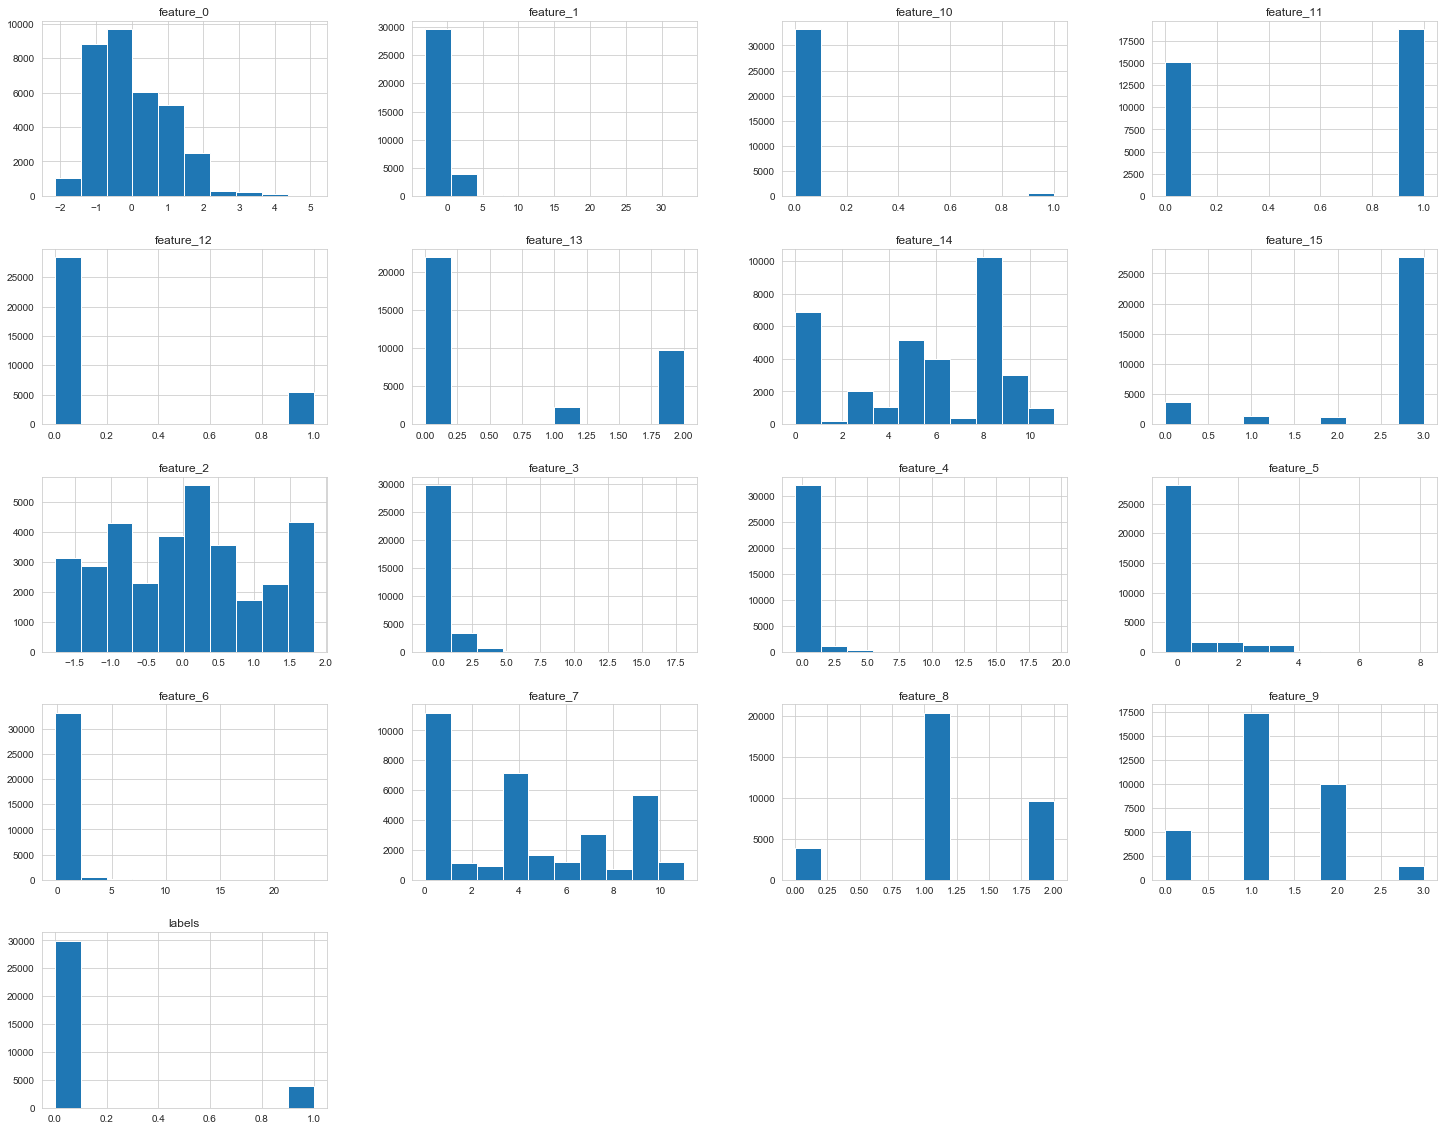

<Figure size 432x288 with 0 Axes>

In [17]:
train.hist(figsize=(25,20))
plt.show()
plt.savefig("ins-hist.png")

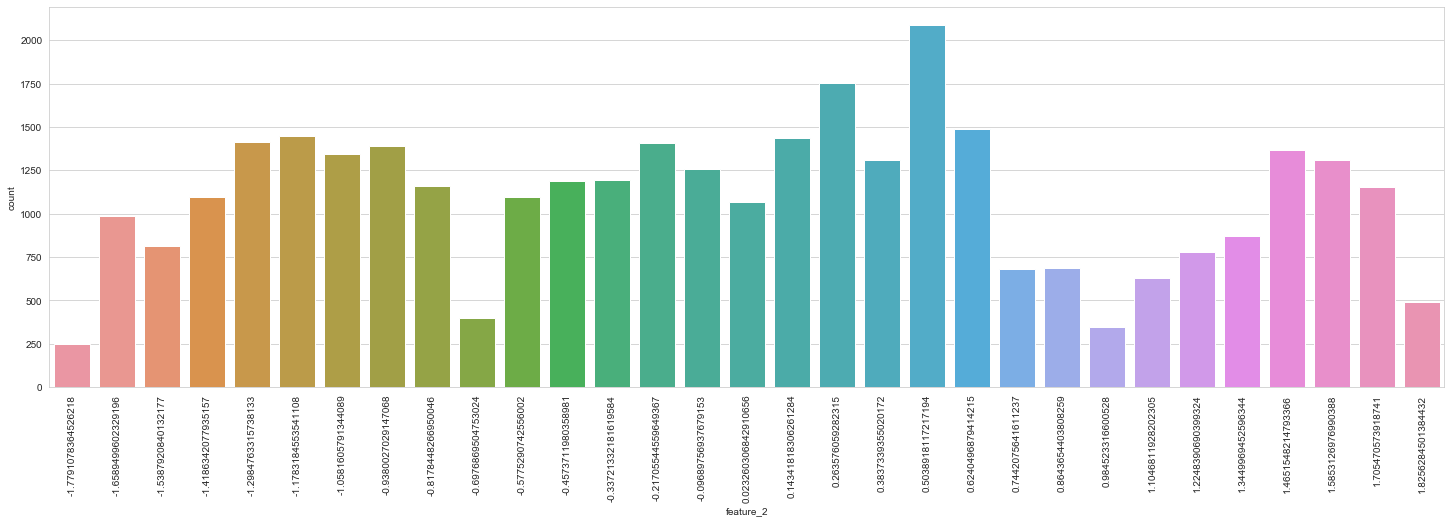

In [20]:
plt.figure(figsize=(25,7))
sns.countplot(train["feature_2"])
plt.xticks(rotation=90)
plt.savefig("ins-feat2.png")

In [ ]:
# Lets split training dataset into dependent and independent dataset

In [21]:
y=train["labels"]
x=train.drop("labels",axis=1)

In [ ]:
# Lets check feature importance

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.10321545 0.1128106  0.0875373  0.29089952 0.03937156 0.04788529
 0.02678622 0.04899929 0.02115742 0.02964813 0.00201302 0.02971839
 0.01097276 0.02083847 0.08144494 0.04670166]


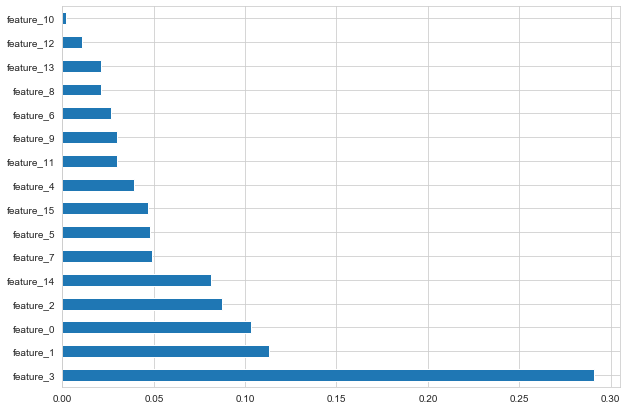

<Figure size 432x288 with 0 Axes>

In [24]:
fig=plt.figure(figsize=(10,7))
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()
plt.savefig("ins-featimp.png")

In [ ]:
# splitting the dataset using train test split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Printing the shape of splitted dataset

In [26]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (23735, 16)
shape of y_train: (23735,)
shape of x_test: (10173, 16)
shape of y_test: (10173,)


In [ ]:
# Applying machine learning algorithm on train dataset

In [ ]:
# Extra trees classifier

In [27]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

In [ ]:
# Looking at the output

In [29]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})

In [ ]:
# Evaluating result

In [30]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.9020937776467118
Kappa is : 0.39464213635838963
Sensitiviy is : 0.3261410788381743
Precision is : 0.6811091854419411
R2 score is: 0.06238243121694087
Area under curve is  :0.6528118418276508
[[8784  184]
 [ 812  393]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8968
           1       0.68      0.33      0.44      1205

    accuracy                           0.90     10173
   macro avg       0.80      0.65      0.69     10173
weighted avg       0.89      0.90      0.89     10173



In [ ]:
# Bagging classifier

In [31]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [32]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8967856089649071
Kappa is : 0.4120011837428249
Sensitiviy is : 0.3800829875518672
Precision is : 0.6018396846254928
R2 score is: 0.0115477437527991
Area under curve is  :0.6731480950248185
[[8665  303]
 [ 747  458]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8968
           1       0.60      0.38      0.47      1205

    accuracy                           0.90     10173
   macro avg       0.76      0.67      0.70     10173
weighted avg       0.88      0.90      0.89     10173



In [ ]:
# KNN

In [33]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [34]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8946230217241719
Kappa is : 0.3666622877884702
Sensitiviy is : 0.3203319502074689
Precision is : 0.6040688575899843
R2 score is: -0.009162684473332794
Area under curve is  :0.6460602659155096
[[8715  253]
 [ 819  386]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8968
           1       0.60      0.32      0.42      1205

    accuracy                           0.89     10173
   macro avg       0.76      0.65      0.68     10173
weighted avg       0.88      0.89      0.88     10173



In [ ]:
# Random forest

In [35]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [36]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.9033716701071464
Kappa is : 0.44019131684755
Sensitiviy is : 0.391701244813278
Precision is : 0.6537396121883656
R2 score is: 0.07462041153238241
Area under curve is  :0.6819121745921876
[[8718  250]
 [ 733  472]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8968
           1       0.65      0.39      0.49      1205

    accuracy                           0.90     10173
   macro avg       0.79      0.68      0.72     10173
weighted avg       0.89      0.90      0.89     10173



In [ ]:
# CART

In [37]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [38]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.8801730069792588
Kappa is : 0.4172261091661379
Sensitiviy is : 0.4763485477178423
Precision is : 0.4939759036144578
R2 score is: -0.14754600034794074
Area under curve is  :0.7053910445993316
[[8380  588]
 [ 631  574]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8968
           1       0.49      0.48      0.49      1205

    accuracy                           0.88     10173
   macro avg       0.71      0.71      0.71     10173
weighted avg       0.88      0.88      0.88     10173



In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
sv_classifier=SVC()

In [40]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [43]:
grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
prediction=grid.predict(x_test)

In [ ]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

In [46]:
xgb=XGBClassifier()

In [47]:
prediction= xgb.fit(x_train,y_train).predict(x_test)

In [48]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.90376486778728
Kappa is : 0.4727164510799332
Sensitiviy is : 0.44813278008298757
Precision is : 0.6323185011709602
R2 score is: 0.0783859439371336
Area under curve is  :0.7065596995865429
[[8654  314]
 [ 665  540]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8968
           1       0.63      0.45      0.52      1205

    accuracy                           0.90     10173
   macro avg       0.78      0.71      0.74     10173
weighted avg       0.89      0.90      0.90     10173



In [ ]:
# Using xgboost on test data

In [49]:
prediction=xgb.fit(x,y).predict(test)

In [51]:
final_submission=pd.DataFrame({"labels":prediction})

In [ ]:
# Converting to csv

In [53]:
final_submission.to_csv("Ins-churn1.csv",index=False)